# 6.4 U.S.A Real Estate Machine Learning Part 1 -NK (house_size vs price)

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_clean6.pkl'))

In [5]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'Price category'],
      dtype='object')

In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


In [7]:
df.shape

(2217918, 13)

#### Missing Values Check


In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
Price category    0
dtype: int64

#### Dulicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(2217918,)

#### Extreme Values Check

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_28113/4193563185.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=15) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 9950000.0)

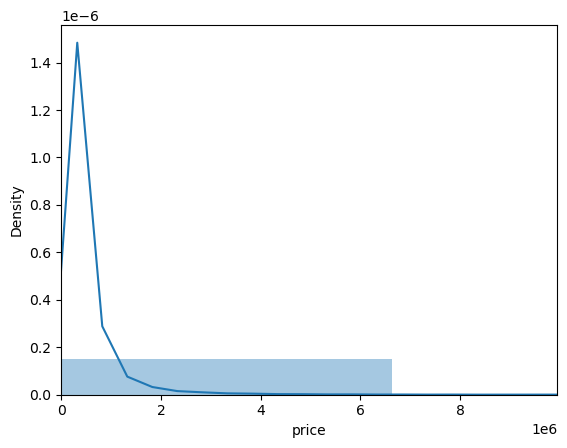

In [11]:
sns.distplot(df['price'], bins=15) # Shows extreme values
plt.xlim([0, 9950000 ]) # set x axis liimits (I added this but doesn't seem to make a difference)

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['price'].mean() # Check the mean

520393.44181488676

In [13]:
df['price'].median() # Check the median

325000.0

In [14]:
df['price'].max() # Check the max

99500000.0

In [15]:
df['price'].min()

1.0

### 3. Data prep for regression analysis 

### Hypothesis: Properties with bigger house sizes will have higher prices

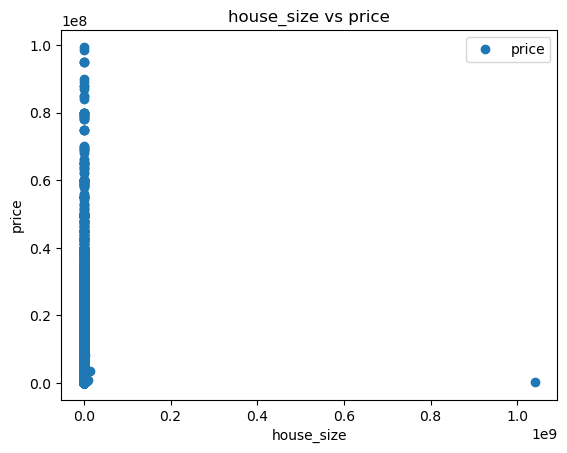

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'house_size', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('house_size vs price')  
plt.xlabel('house_size')  
plt.ylabel('price')  
plt.savefig('firstplot_bed_price.png')
plt.show()

THere is an outlier showing large house size.  I will remove this to see a better picture of the data trend.  THis is likely skewing the numbers.

In [17]:
# first I will look at the stats, specifically the max for house_size
df['house_size'].describe()

count    2.217918e+06
mean     2.716077e+03
std      6.987233e+05
min      4.000000e+00
25%      1.456000e+03
50%      2.160000e+03
75%      2.715133e+03
max      1.040400e+09
Name: house_size, dtype: float64

In [18]:
# check how many extreme outliers there are  
# this amount chosen assuming 2500 is a standard size,

df[df['house_size'] > 10000]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
42,52707.0,for_sale,400000.0,3.275919,2.496373,0.99,1857015.0,Moca,Puerto Rico,676.0,43082.0,0,Middle price
303,52707.0,for_sale,2500000.0,6.000000,8.000000,9.65,1856949.0,Cabo Rojo,Puerto Rico,623.0,10244.0,0,High price
346,108122.0,for_sale,435000.0,3.000000,3.000000,0.36,2396.0,Sabana Grande,Puerto Rico,637.0,20132.0,0,Middle price
372,62210.0,for_sale,108000.0,4.000000,1.000000,0.94,1670695.0,Utuado,Puerto Rico,641.0,13818.0,0,Middle price
705,61834.0,for_sale,400000.0,7.000000,4.000000,0.39,82996.0,Mayaguez,Puerto Rico,682.0,17198.0,0,Middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209923,78942.0,sold,6150000.0,3.275919,2.496373,5.60,1334464.0,Olympia,Washington,98513.0,32950.0,2022-03-14,High price
2214145,98644.0,sold,1625000.0,3.000000,4.000000,1.21,1752402.0,Castle Rock,Washington,98611.0,16749.0,2021-12-08,High price
2216555,108337.0,sold,3950000.0,8.000000,8.000000,201.40,1016017.0,Cle Elum,Washington,98922.0,10094.0,2022-04-04,High price
2221460,85499.0,sold,3750000.0,7.000000,13.000000,5.99,32348.0,Kennewick,Washington,99338.0,21200.0,2022-01-31,High price


In [19]:
# create a subset with only homes below 10000 to remove these outliers

df_2 = df[df['house_size'] <= 10000]

In [20]:
df_2.shape # original data shape minus this one equals 4189, showing it was done correctly

(2213729, 13)

## Let's try it again now with outliers removed

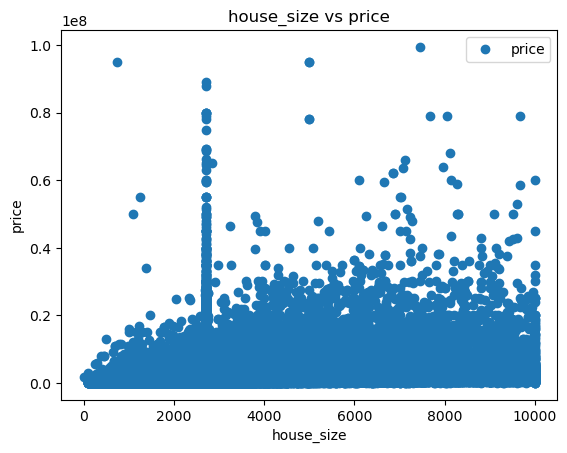

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2.plot(x = 'house_size', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('house_size vs price')  
plt.xlabel('house_size')  
plt.ylabel('price')  
plt.savefig('scatter_bed_price.png')
plt.show()

This is a much more accurate picture of what is to be expected.  Interesting that I see a trend in house_size that lookds to be around the 2500 square foot mark.  This makes sense as this is a standard to large size for a house.  Location is probably affecting the price in these standard size homes (versus the size of the home itelf).

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2['house_size'].values.reshape(-1,1)
y = df_2['price'].values.reshape(-1,1)

In [23]:
X

array([[ 920.],
       [1527.],
       [ 748.],
       ...,
       [3200.],
       [ 933.],
       [3615.]])

In [24]:
y

array([[105000.],
       [ 80000.],
       [ 67000.],
       ...,
       [440000.],
       [179900.],
       [580000.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

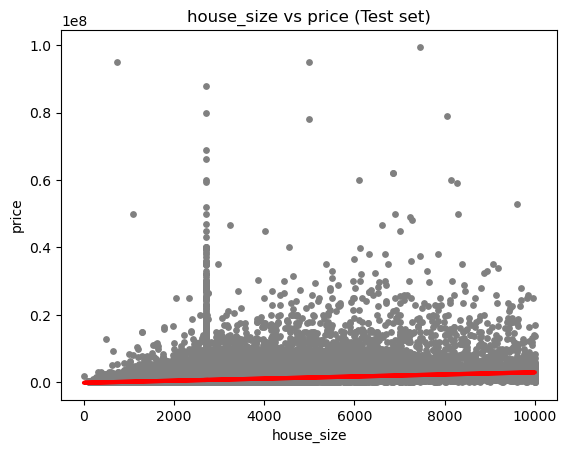

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('house_size vs price (Test set)')
plot_test.xlabel('house_size')
plot_test.ylabel('price')
plot_test.savefig('test_plot_house_price.png')
plot_test.show()

This line shows the expected trajectory of larger house size, correlating wtih higher price, but it is a low incline due to all of the noise

In [30]:
# Save the figure
plt.savefig("scatter_plot_house_size.png")

<Figure size 640x480 with 0 Axes>

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[309.95246322]]
Mean squared error:  969748523249.7866
R2 score:  0.08651396755316376


#### - Positive slope is slight  (as x rises, y rises, meaning as number of bed increases, so does the price)
#### - Mean squared error (MSE) doesn't make sense (too large), implicating that this does not have good accuracy
#### - R2 score is closer to1han 0, making a good fit

In [33]:
y_predicted

array([[672989.8377918 ],
       [399880.49401991],
       [714792.19664851],
       ...,
       [367025.53291889],
       [672989.8377918 ],
       [672989.8377918 ]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,185000.0,6.729898e+05
1,279000.0,3.998805e+05
2,425000.0,7.147922e+05
3,1599000.0,6.280055e+05
4,549000.0,1.045202e+06
5,490000.0,6.729898e+05
6,89900.0,1.736152e+05
7,650000.0,4.835677e+05
8,525000.0,7.045638e+05
9,200000.0,6.729898e+05


##### Compare how the regression fits the training set

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[309.95246322]]
Mean squared error:  924959586699.5526
R2 score:  0.08896332862815393


##### Compare the predicted y values with the actual y values in a dataframe.
##### Slope: 309.95 
##### Mean squared error:  924959586699.5526
##### R2 score:  .088 IS ONLY SLIGHTLY LARGER THEN PRIOR at .0865
##### THey are very similar to prior values

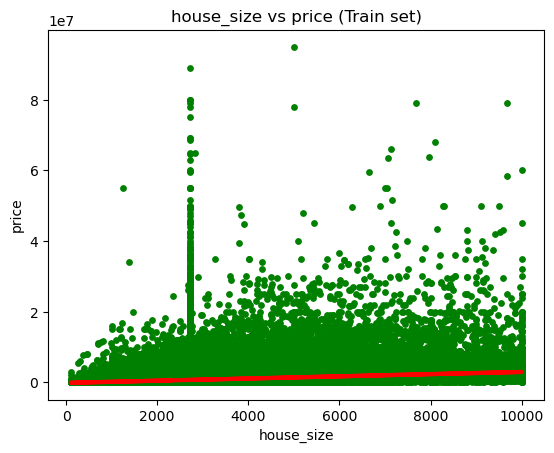

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('house_size vs price (Train set)')
plot_test.xlabel('house_size')
plot_test.ylabel('price')
plot_test.savefig('train_plot_bed_price.png')
plot_test.show()

##### Based off the visulization of these data points, I can speculate that removing outliers will not change the relationship between price of house and number of bedrooms as far as positive correlation, however it m ay be stronger with outliers removed.

In [39]:
df_2['price'].describe()

count    2.213729e+06
mean     5.082119e+05
std      1.014483e+06
min      1.000000e+00
25%      1.650000e+05
50%      3.250000e+05
75%      5.499990e+05
max      9.950000e+07
Name: price, dtype: float64

In [40]:
df_fixed = df_2[df_2['price']< 99500000]

In [41]:
df_fixed['price'].describe()

count    2.213728e+06
mean     5.081672e+05
std      1.012299e+06
min      1.000000e+00
25%      1.650000e+05
50%      3.250000e+05
75%      5.499990e+05
max      9.500000e+07
Name: price, dtype: float64

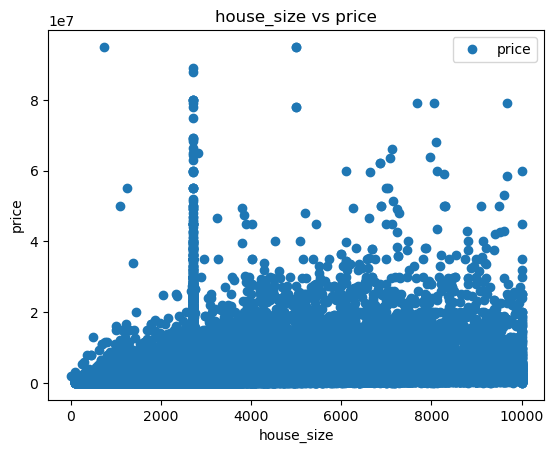

In [42]:
# Create a scatterplot (adjusted price) using matplotlib for another look.
 # The style option creates a scatterplot; without it, we only have lines.
    
df_fixed.plot(x = 'house_size', y='price',style='o')
plt.title('house_size vs price')  
plt.xlabel('house_size')  
plt.ylabel('price')  
plt.savefig('scatter_adjusted_bed_price.png')
plt.show()

It's very similar as expected

## Export data, df_2 with adjusted price and house_size

In [84]:
# export as df_clean7

df_2.to_pickle(os.path.join(path,'Prepared Data', 'df_clean7.pkl'))